## Reading PDF files to review our Documents Type

In [1]:

import os
import fitz  # PyMuPDF

# Define the folder path
folder_path = os.path.dirname(r'D:\myFiles\Machine-Learning-Projects\QWEN-ocr_model\عقد عمل دوام كامل استقدام من الخارج.pdf')

# Find all PDF files in the folder
files = [f for f in os.listdir(folder_path) if f.lower().endswith('.pdf')]

if files:
    pdf_path = os.path.join(folder_path, files[0])
    doc = fitz.open(pdf_path)
    text = doc[0].get_text()
    print(f"Reading from: {pdf_path}")
    print(text)
else:
    print(f"No PDF files found in: {folder_path}")

Reading from: D:\myFiles\Machine-Learning-Projects\QWEN-ocr_model\عقد عمل دوام كامل استقدام من الخارج.pdf
Contract preview
مشاهدة العقد
EMPLOYMENT CONTRACT FULL WORK‌عقد عمل دوام كامل
Work permit (Recruiting a worker from outside the country)
)تصريح العمل (استقدام عامل من خارج الدولة
Work Style
Full Work
 دوام كامل
نمط العمل
Transaction Number
MB291046226AE
 
MB291046226AEرقم املعاملة
It is on Wednesday  Corresponding to  21/05/2025  in UAE
1. Establishment Name
NOOR ALMAMZAR MEDICAL CENTRE L.L.C
Establishment No
1233272
Represented by
ADHAM ALI BAKRI
Passport No
N016323869
Nationality
COMMONWEALTH OF DOMINICA
Title
owner
Emirate
Dubai
Telephone Number
0543726409
E-Mail
hr@nooralmamzar.com
Herein after referred to as the First Party / Employer in this Employment Contract
 
بين كل من 21/05/2025  املوافق االربعاء إنه في يوم
.اسم املنشأة1مركز نور املمزر الطبي ش.ذ.م.م
رقم املنشأة1233272
و يمثلها
ادهم على بكرى
رقم الجوازN016323869ا لجنسية
كمنولث دومينكا
الصفة
مالك
اإلمارة
دبي
رقم الهاتف0543

Convert PDF to Image and then use OCR to extract text from the image.


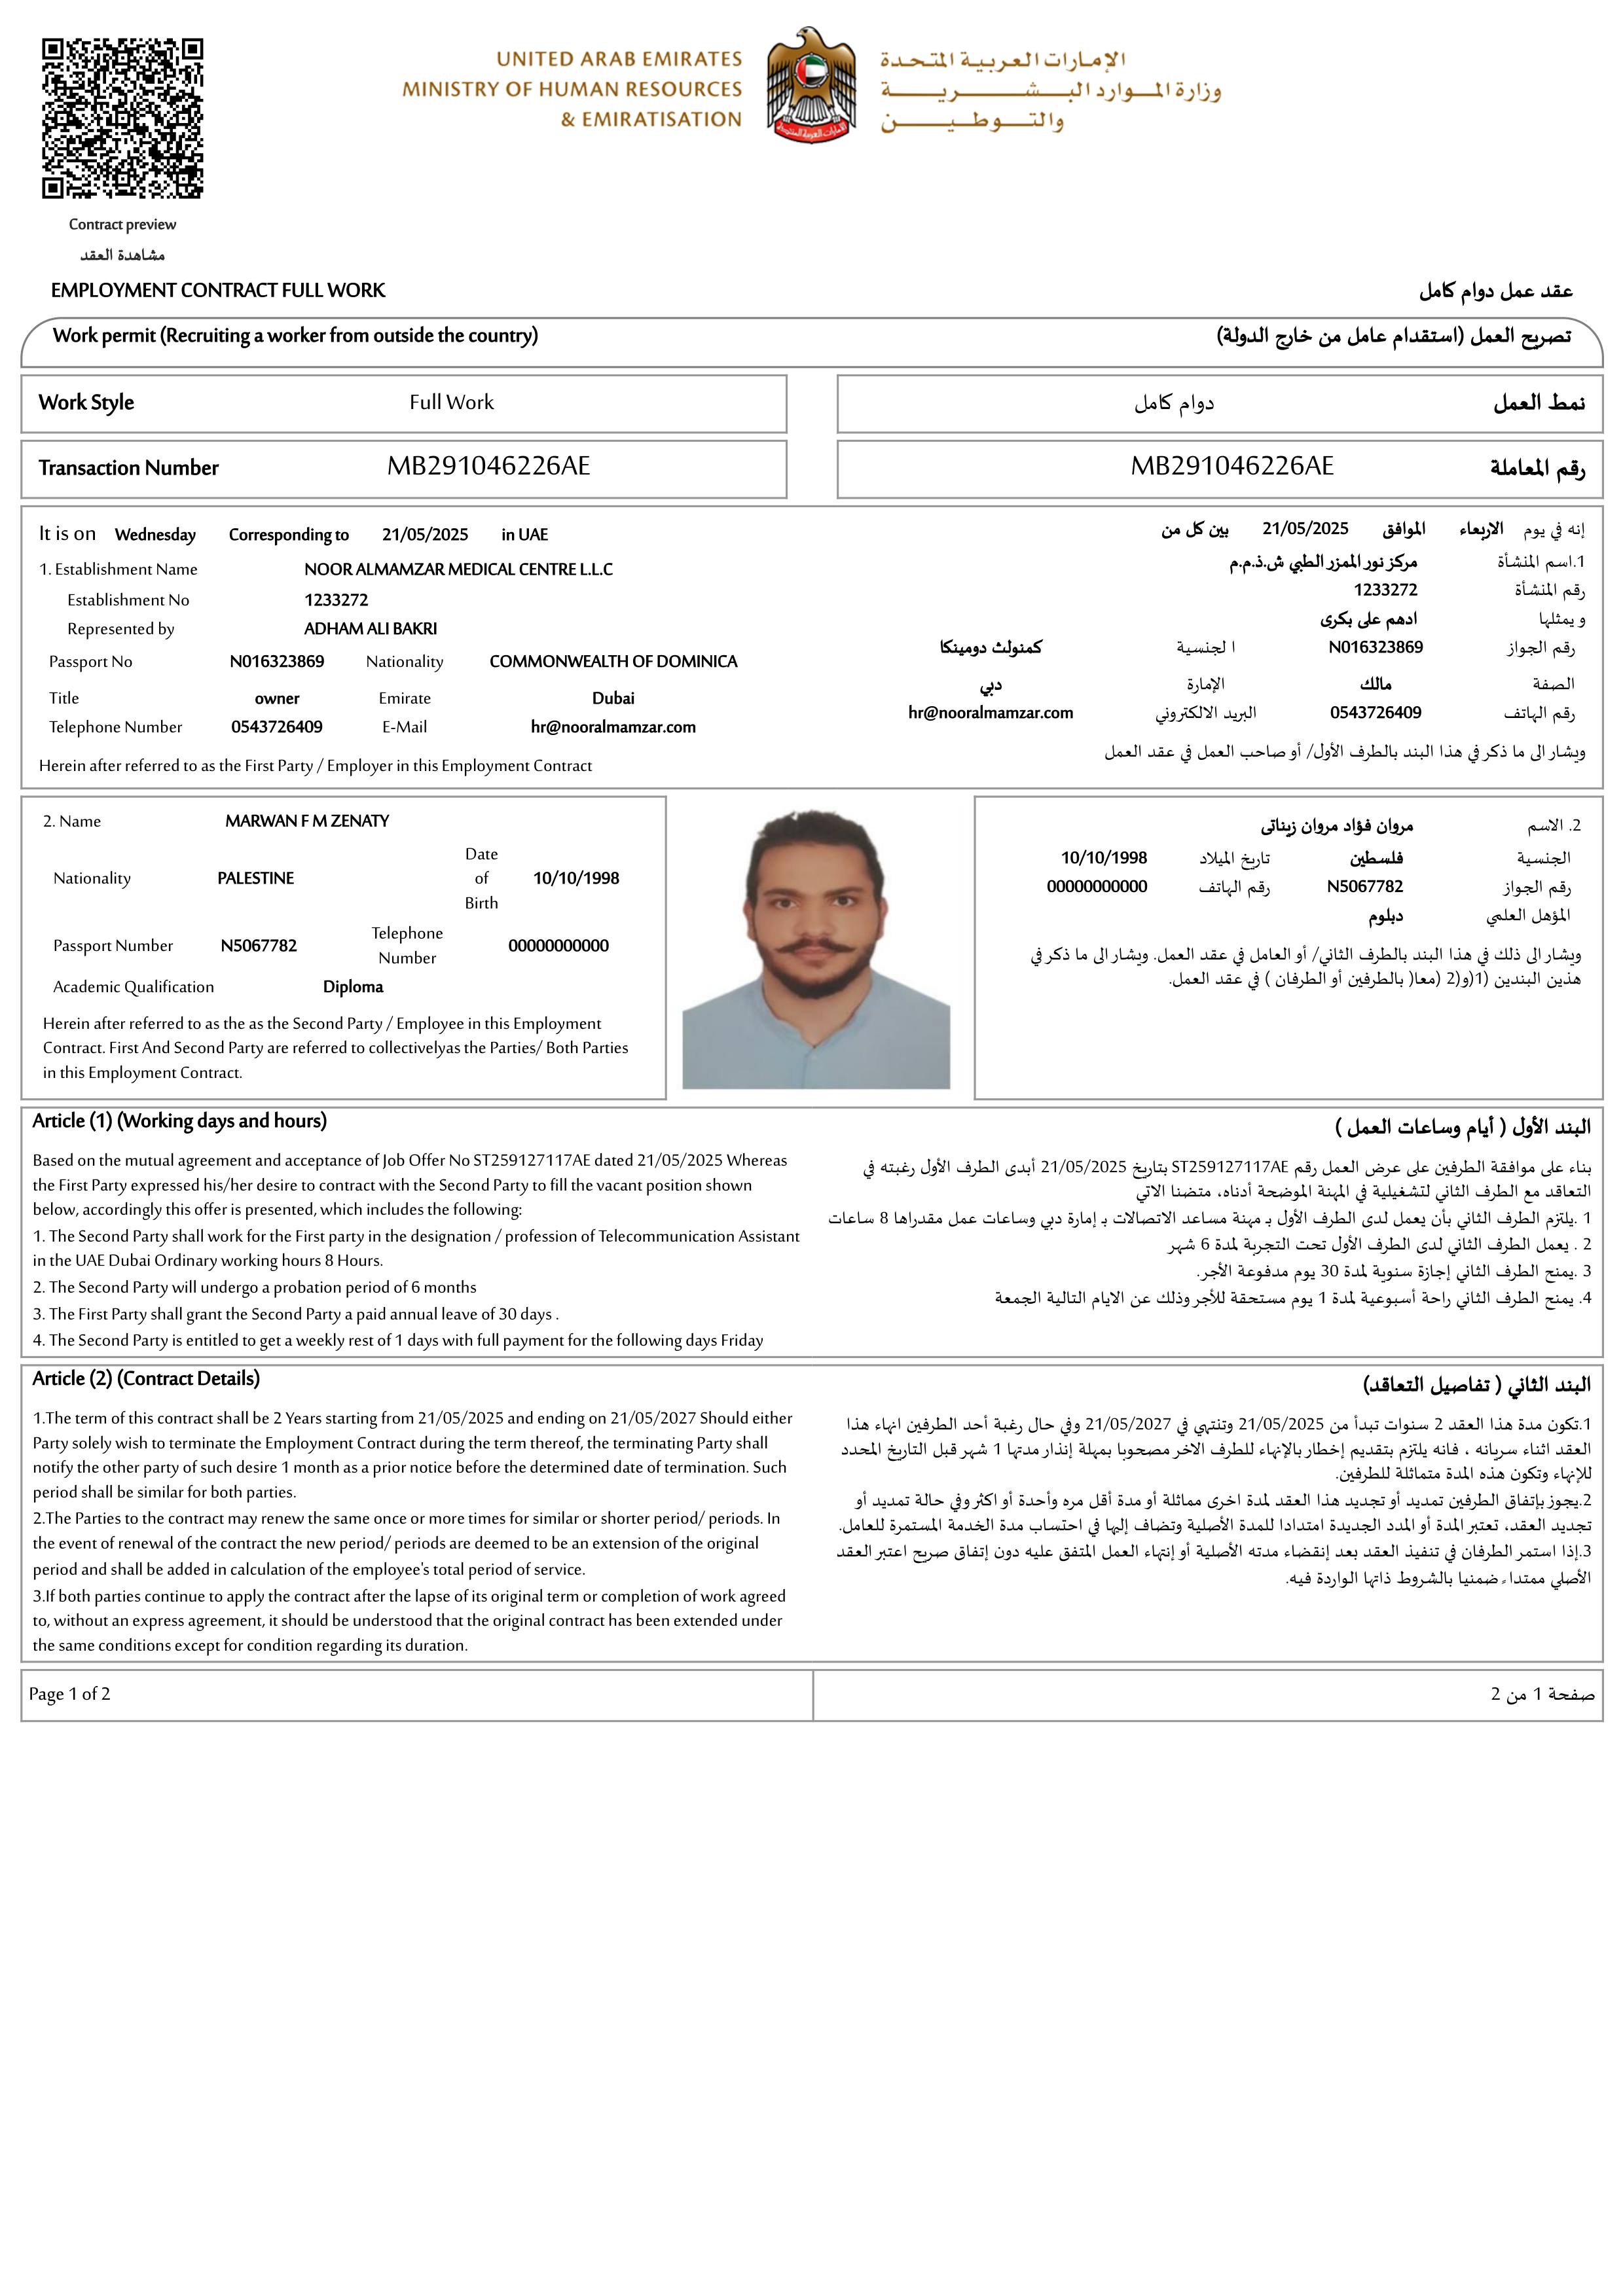

In [2]:
from PIL import Image
import io

import fitz  # PyMuPDF

# Convert each page of the PDF to an image and save/display
pdf_doc = fitz.open(pdf_path)
images = []
for i, page in enumerate(pdf_doc):
    pix = page.get_pixmap(dpi=300)
    img = Image.open(io.BytesIO(pix.tobytes("png"))).convert("RGB")
    images.append(img)
    # Optionally save the image
    img.save(f"page_{i+1}.png")
    # Optionally display the image in notebook
    display(img)
    break

##  Large Language Models (LLMs)

#### 1. QWEN OCR:
- Multilingual Support:
- Trained on large-scale data that includes Chinese, English, and other languages.
- Strong performance on mixed-language content (e.g., Chinese-English text).
- QWEN OCR is a proprietary model focused on text extraction.
- QWEN OCR is specifically designed for extracting text from images of documents, tables, and payslips.
- Qwen2-VL-2B-OCR is a fine-tuned variant of unsloth/Qwen2-VL-2B-Instruct, optimized specifically for Optical Character Recognition (OCR).

In [ ]:
from transformers import AutoProcessor, AutoModelForImageTextToText
import requests
import torch
# Define the size dictionary with the required keys
# These values are based on the error message's suggested default if size is None
# You might need to adjust these based on the specific model documentation if available
processor_kwargs = {
    "size": {"shortest_edge": 56 * 56, "longest_edge": 28 * 28 * 1280}
}

# Load model from local path
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = r"C:\Users\MICROTEL\Downloads\Machine-Learning-Projects-main\Machine-Learning-Projects-main\Employees_Data_Detection\Qwen2-VL-2B-OCR"
processor = AutoProcessor.from_pretrained(model_path, **processor_kwargs)
model = AutoModelForImageTextToText.from_pretrained(model_path)

# model = AutoModelForImageTextToText.from_pretrained(model_path, torch_dtype=torch.float16, device_map="auto") # auto device placement, offloading to CPU if needed
model = AutoModelForImageTextToText.from_pretrained(model_path, torch_dtype=torch.float16)  # Move model to the specified device (GPU or CPU)

In [ ]:
import requests
import torch
import time
from torchvision import io
from typing import Dict

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to the right device
# model = model.to(device)

conversation = [
    {
        "role":"user",
        "content":[
            {
                "type":"image",
            },
            {
                "type":"text",
                "text": (
                    "Detect the document type (e.g., Visa, Change Status, Employment Contract), "
                    "then extract key fields accordingly."
                    "For Visa (TOURISM or EMPLOYMENT): Visa Type, Date & Place of Issue, Valid Until, "
                    "U.I.D No, Full Name, Nationality, Passport No, Profession."
                    "For Change Status: U.I.D No, Name, Nationality, Passport No, Employer Name, "
                    "'Residence must be stamped up to' + date."
                    "For Employment Contract: Transaction Number, Name, Nationality, Passport Number, "
                    "Date of Birth, Contract Duration."
)
            }
        ]
    }
]


# Preprocess the inputs
text_prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
# Excepted output: '<|im_start|>system\nYou are a helpful assistant.<|im_end|>\n<|im_start|>user\n<|vision_start|><|image_pad|><|vision_end|>Describe this image.<|im_end|>\n<|im_start|>assistant\n'

inputs = processor(text=[text_prompt], images=[img], padding=True, return_tensors="pt")
#inputs = inputs.to('cuda')
# Move input tensors to the same device
inputs = {k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}



start = time.time() 
# Inference: Generation of the output
output_ids = model.generate(**inputs, max_new_tokens=2048)
#generated_ids = [output_ids[len(input_ids):] for input_ids, output_ids in zip(inputs.input_ids, output_ids)]
generated_ids = [output_ids[len(input_ids):] for input_ids, output_ids in zip(inputs["input_ids"], output_ids)]

output_text = processor.batch_decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)
elapsed = time.time() - start
print(f"Inference time: {elapsed:.2f} sec")

Inference time: 5.31 sec


In [ ]:
print(output_text[0])

Employment Contract
Transaction Number: MB291046226AE
Work Style: Full Work
Employer Name: NOOR ALMAMZAR MEDICAL CENTRE LLC
Nationality: COMMONWEALTH OF DOMINICA
Date of Birth: 10/10/1998
Contract Duration: 2 years
U.I.D No: NS067782
Full Name: MARWAN F M ZENATY
Nationality: PALESTINE
Passport No: N016323869
Profession: Telecommunication Assistant
Validity Period: 21/05/2025 to 20/05/2027
Page 1 of 2
صفحة 1 من 2
